#CAT or DOG Image Classifier Using KERAS

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import zipfile
import os

%matplotlib inline

Downloading Dataset

In [0]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-07-13 06:46:45--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.210.252.197, 2a02:26f0:d6:48e::e59, 2a02:26f0:d6:49c::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.210.252.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   242MB/s    in 3.2s    

2019-07-13 06:46:48 (242 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [0]:
#unzip downloaded dataset

with zipfile.ZipFile("kagglecatsanddogs_3367a.zip","r") as zip_ref:
    zip_ref.extractall()
    
!ls

 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


## Sample Images

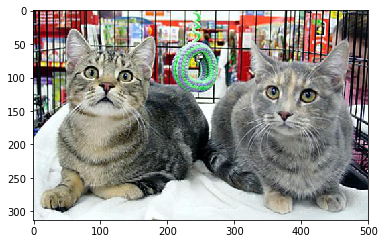

In [0]:
#sample cat image

image = plt.imread("PetImages/Cat/10064.jpg")
plt.imshow(image)

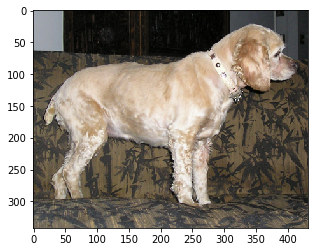

In [0]:
#sample dog image

image = plt.imread("PetImages/Dog/10064.jpg")
plt.imshow(image)


## Preprocessing Dataset

In [0]:
DIRECTORY = 'PetImages'
CATEGORIES = ['Dog','Cat']
IMG_SIZE = 30
training_data = []

for category in CATEGORIES:
  path = os.path.join(DIRECTORY, category)
  category_num = CATEGORIES.index(category)
  for img in os.listdir(path):
    try:
      #converting to grayscale images
      gray_image = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      #reshaping all images
      reshaped_img = cv2.resize(gray_image,(IMG_SIZE,IMG_SIZE))
      #normalising the image
      reshaped_img = reshaped_img/255.0
      #add reshaped images to an array, with labels
      training_data.append([reshaped_img,category_num])
    except Exception as e:
      #faulty images
      pass
        

In [0]:
import random

#shuffling the dataset
random.shuffle(training_data)

In [0]:
X = []
y = []

for feature, label in training_data:
  X.append(feature) #array of features
  y.append(label)   #array of labels
  
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #kers prerequisite

In [0]:
X.shape

(24946, 30, 30, 1)

## Keras CNN Model

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Flatten,Dropout,AveragePooling2D

In [0]:
#defining model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_3 (Average (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [0]:
#compiling model
model.compile(
             loss='binary_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [0]:
#training
model.fit(X,y, batch_size=100,
          epochs=50, validation_split=0.2)

Train on 19956 samples, validate on 4990 samples


W0713 06:50:47.527674 139870946436992 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/optimizer_v2/adagrad.py:105: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/50
19956/19956 [==============================] - 5s 260us/sample - loss: 0.6766 - acc: 0.5775 - val_loss: 0.6592 - val_acc: 0.5972
Epoch 2/50
19956/19956 [==============================] - 2s 109us/sample - loss: 0.6486 - acc: 0.6236 - val_loss: 0.6389 - val_acc: 0.6415
Epoch 3/50
19956/19956 [==============================] - 2s 109us/sample - loss: 0.6374 - acc: 0.6391 - val_loss: 0.6324 - val_acc: 0.6395
Epoch 4/50
19956/19956 [==============================] - 2s 109us/sample - loss: 0.6337 - acc: 0.6431 - val_loss: 0.6297 - val_acc: 0.6477
Epoch 5/50
19956/19956 [==============================] - 2s 108us/sample - loss: 0.6298 - acc: 0.6434 - val_loss: 0.6355 - val_acc: 0.6305
Epoch 6/50
19956/19956 [==============================] - 2s 108us/sample - loss: 0.6267 - acc: 0.6488 - val_loss: 0.6227 - val_acc: 0.6539
Epoch 7/50
19956/19956 [==============================] - 2s 108us/sample - loss: 0.6243 - acc: 0.6525 - val_loss: 0.6262 - val_acc: 0.6397
Epoch 8/50
19956/199

The model could be made better by tuning the parameters and there other prepocessing methods too.


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
IMAGE_NAME = fn


Saving download (1).jpeg to download (1).jpeg
User uploaded file "download (1).jpeg" with length 11783 bytes


In [0]:
test_image = cv2.imread(IMAGE_NAME,cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image,(IMG_SIZE,IMG_SIZE))
test_image = test_image/255
test_image = np.array(test_image).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
prediction = model.predict([test_image])
print(prediction)

[[0.21900323]]


In [0]:
prediction_out = [1 if value>0.49 else 0 for value in prediction]
prediction_out

[0]

In [0]:
print(CATEGORIES[int(prediction_out[0])])

Dog


In [0]:
#to download file from colab
#from google.colab import files
#files.download('filename')